In [16]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = sqlite3.connect('data/im.db')

In [3]:
bom_movie_gross = pd.read_csv("data/bom.movie_gross.csv")
rt_movie_info = pd.read_csv("data/rt.movie_info.tsv", sep='\t')
rt_reviews = pd.read_csv('data/rt.reviews.tsv', sep='\t',encoding='windows-1252')
tmdb_movies = pd.read_csv("data/tmdb.movies.csv")
tn_movie_budgets = pd.read_csv("data/tn.movie_budgets.csv", parse_dates=['release_date'])

In [4]:
## Making copy of movie budgets data frame for cleaning
tn_movie_budgets_clean = tn_movie_budgets.copy()

## turning the columns with dollar amounts into int types in millions of dollars
tn_movie_budgets_clean['production_budget_in_millions'] = tn_movie_budgets_clean['production_budget'].str.strip('$').str.replace(',', '')
tn_movie_budgets_clean['production_budget_in_millions'] = tn_movie_budgets_clean['production_budget_in_millions'].astype('int64') / 1000000

tn_movie_budgets_clean['domestic_gross_in_millions'] = tn_movie_budgets_clean['domestic_gross'].str.strip('$').str.replace(',', '')
tn_movie_budgets_clean['domestic_gross_in_millions'] = tn_movie_budgets_clean['domestic_gross_in_millions'].astype('int64') / 1000000

tn_movie_budgets_clean['worldwide_gross_in_millions'] = tn_movie_budgets_clean['worldwide_gross'].str.strip('$').str.replace(',', '')
tn_movie_budgets_clean['worldwide_gross_in_millions'] = tn_movie_budgets_clean['worldwide_gross_in_millions'].astype('int64') / 1000000



In [5]:
##df2 = df[(df['Date'] > "2020-09-20") & (df['Date'] < "2021-11-17")]
tn_movie_budgets_clean = tn_movie_budgets_clean[tn_movie_budgets_clean['release_date'] >= "2010-01-01"]

In [6]:
tn_movie_budgets_clean.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_in_millions,domestic_gross_in_millions,worldwide_gross_in_millions
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410.6,241.063875,1045.663875
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350.0,42.762350,149.762350
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330.6,459.005868,1403.013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317.0,620.181382,1316.721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",306.0,936.662225,2053.311220


In [7]:
tn_movie_budgets_clean = tn_movie_budgets_clean[tn_movie_budgets_clean['domestic_gross_in_millions'] != 0]
tn_movie_budgets_clean.describe()

,id,production_budget_in_millions,domestic_gross_in_millions,worldwide_gross_in_millions
count,1787.000000,1787.000000,1787.000000,1787.000000
mean,50.518747,42.874904,54.158812,136.740838
std,28.402089,54.645221,85.289310,231.349910
min,1.000000,0.009000,0.000388,0.000528
25%,27.000000,7.600000,3.025756,9.038103
50%,50.000000,21.000000,25.135965,48.330757
75%,75.000000,52.000000,65.007803,151.992924
max,100.000000,410.600000,936.662225,2053.311220


In [8]:
tn_movie_budgets_clean['release_date'].describe()

<ipython-input-8-c9582203674f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  tn_movie_budgets_clean['release_date'].describe()


count                    1787
unique                    597
top       2010-10-15 00:00:00
freq                        8
first     2010-01-08 00:00:00
last      2019-06-14 00:00:00
Name: release_date, dtype: object

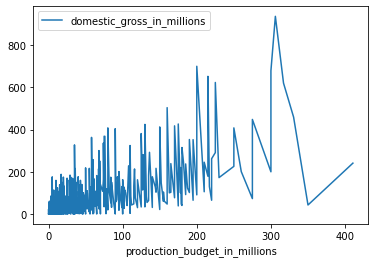

In [9]:
tn_movie_budgets_clean.plot.line('production_budget_in_millions', 'domestic_gross_in_millions');

In [10]:
tn_movie_budgets_clean['ROI_domestic'] = (tn_movie_budgets_clean['domestic_gross_in_millions'] / tn_movie_budgets_clean['production_budget_in_millions']) * 100
tn_movie_budgets_clean['ROI_international'] = (tn_movie_budgets_clean['worldwide_gross_in_millions'] / tn_movie_budgets_clean['production_budget_in_millions']) * 100
tn_movie_budgets_clean.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_in_millions,domestic_gross_in_millions,worldwide_gross_in_millions,ROI_domestic,ROI_international
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410.6,241.063875,1045.663875,58.710150,254.667286
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350.0,42.762350,149.762350,12.217814,42.789243
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330.6,459.005868,1403.013963,138.840250,424.384139
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317.0,620.181382,1316.721747,195.640815,415.369636
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",306.0,936.662225,2053.311220,306.098766,671.016739


In [11]:
df_ratings_raw = pd.read_sql('''
SELECT genres as "Genre", numvotes as "Votes"
FROM movie_basics as mb,movie_ratings as mr
where mb.movie_id = mr.movie_id

ORDER BY

numvotes desc


Limit 20

''', conn)

In [12]:
df_ratings_explode = df_ratings_raw[['Votes','Genre']]
df_ratings_explode = df_ratings_explode.set_index('Votes').apply(lambda x: x.str.split(',').explode()).reset_index()

df_ratings_explode.drop_duplicates(inplace = True)
df_ratings = df_ratings_explode.groupby('Genre').sum()
df_ratings.reset_index(inplace = True)
df_ratings.sort_values(by=['Votes'], inplace=True, ascending = False)

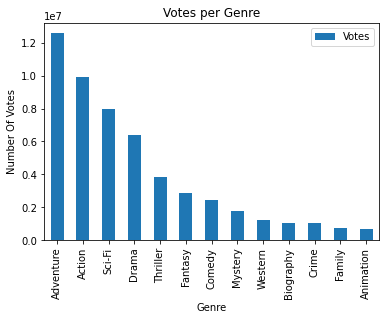

In [13]:
df_ratings.plot(kind = "bar", x = "Genre", y ="Votes")

plt.title("Votes per Genre")
plt.xlabel("Genre")
plt.ylabel("Number Of Votes")
plt.show()


In [36]:
df_runtime_raw = pd.read_sql('''
SELECT 
    primary_title as "Movie", runtime_minutes as "Run Time"
FROM 
    movie_basics as mb
JOIN
    movie_ratings USING (movie_id)
where 
    genres like "%Animation%"
    and  "Run Time" < 200
AND 
    runtime_minutes != "Nan"
ORDER BY
    averagerating DESC
LIMIT 10


''', conn)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Winning Girl'),
  Text(1, 0, 'Leera the Soulmate'),
  Text(2, 0, 'Man in Camo'),
  Text(3, 0, 'Truth Has Fallen'),
  Text(4, 0, 'Bluefish'),
  Text(5, 0, 'Umbilical World'),
  Text(6, 0, 'Tux and Fanny'),
  Text(7, 0, 'Doraleous and Associates'),
  Text(8, 0, 'Mushi-Shi Zoku Shou: Suzu no Shizuku'),
  Text(9, 0, 'Pequenas voces 3d')])

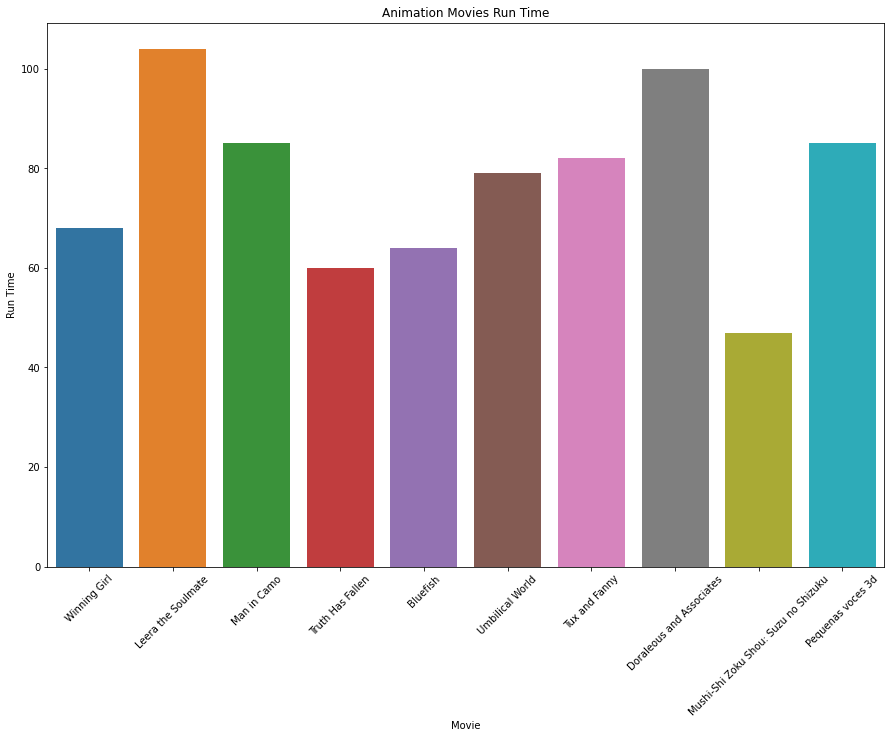

In [37]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data = df_runtime_raw, x='Movie', y='Run Time')
plt.xlabel("Movie")
plt.ylabel("Run Time")
plt.title("Animation Movies Run Time")
plt.xticks(rotation = 45)

